# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

# Importing Diabetes Dataset

In [2]:
df = pd.read_csv("../datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


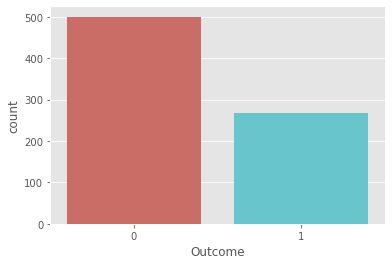

In [3]:
# Lets check the ratio of 1 and 0 of the target variable

sns.countplot(x='Outcome', data=df, palette='hls')
plt.show()

### The count of both classes are not different by large margin, so we'll not use any resampling approach

In [4]:
# Split the dataset into features and target variable

X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

### Splitting dataset into training and testing for understanding model performance

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fitting Logistic regression model considering only first 2 columns i.e. Pregnancies and Glucose as features

In [6]:
from sklearn.linear_model import LogisticRegression
X_train_two = X_train[X_train.columns[0:2]]
X_test_two = X_test[X_test.columns[0:2]]

logreg = LogisticRegression()
logreg.fit(X_train_two,y_train)
y_pred=logreg.predict(X_test_two)

In [7]:
# Confusion matrix

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[113,  17],
       [ 31,  31]])

In [8]:
# Other evaluation metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.75
Precision: 0.6458333333333334
Recall: 0.5


# Fitting Logistic regression model considering all Inputs

In [9]:
logreg_all = LogisticRegression()
logreg_all.fit(X_train,y_train)
y_pred=logreg_all.predict(X_test)

In [10]:
# Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  15],
       [ 25,  37]])

In [11]:
# Other evaluation metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7916666666666666
Precision: 0.7115384615384616
Recall: 0.5967741935483871


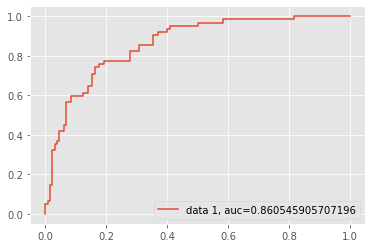

In [12]:
# ROC Curve

y_pred_proba = logreg_all.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Getting Summary of Logistic Regression model (using statsmodel library)

In [13]:
import statsmodels.api as sm

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.622286
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.046     
Dependent Variable:    Outcome            AIC:                732.8739  
Date:                  2021-06-12 13:25   BIC:                767.7228  
No. Observations:      576                Log-Likelihood:     -358.44   
Df Model:              7                  LL-Null:            -375.58   
Df Residuals:          568                LLR p-value:        1.5234e-05
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.0958   0.0318  3.0164 0